# Explore here

It's recommended to use this notebook for exploration purposes.

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página que contiene la tabla
url = 'https://es.wikipedia.org/wiki/Leucocito'

# Realiza una solicitud HTTP a la página web
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Encuentra la tabla en el HTML parseado, ajusta esto según sea necesario
# Por ejemplo, si conoces la clase o el id de la tabla puedes usarlos aquí
table = soup.find('table', {'class': 'wikitable'})

# Convierte la tabla HTML en un DataFrame de Pandas
df = pd.read_html(str(table))[0]

# Muestra las primeras filas del DataFrame
print(df.head())




         Tipo  Apariencia microscópica  Diagrama  \
0  Neutrófilo                      NaN       NaN   
1  Eosinófilo                      NaN       NaN   
2    Basófilo                      NaN       NaN   
3   Linfocito                      NaN       NaN   
4    Monocito                      NaN       NaN   

  Porcentaje aproximado en adultos  \
0                              62%   
1                             2.3%   
2                             0.4%   
3                              30%   
4                             5.3%   

                                       Diámetro (μm)  \
0                                              10-12   
1                                              10-12   
2                                              12-15   
3  Linfocitos pequeños: 7–8 Linfocitos grandes: 1...   
4                                          12-15[8]​   

                             [7]​ Principal objetivo  \
0                             Bacterias Hongos Virus   
1  Macrop

In [21]:
def extract_mean_diameter(diameter_str):
    if pd.isna(diameter_str):
        return None
    try:
        # Maneja rangos como '10-12'
        if '-' in diameter_str:
            low, high = diameter_str.split('-')[0], diameter_str.split('-')[1]
            return (float(low) + float(high.split('[')[0].strip())) / 2
        # Extrae números directamente y maneja posibles notas como '[8]'
        return float(diameter_str.split('[')[0].strip())
    except ValueError:
        return None

df['Diámetro promedio (μm)'] = df['Diámetro (μm)'].apply(extract_mean_diameter)

# Verificar los resultados
print(df['Diámetro promedio (μm)'])


Tipo
Neutrófilo    11.0
Eosinófilo    11.0
Basófilo      13.5
Linfocito      NaN
Monocito      13.5
Name: Diámetro promedio (μm), dtype: float64


In [22]:
import pandas as pd

# Asumiendo que df es tu DataFrame

# Limpiar y convertir porcentajes
def clean_percentage(perc):
    if pd.isna(perc):
        return None  # o puedes retornar 0 o cualquier otro valor predeterminado
    try:
        return float(perc.strip('%')) / 100
    except ValueError:
        return None  # Maneja el caso donde el porcentaje no se puede convertir

df['Porcentaje aproximado en adultos'] = df['Porcentaje aproximado en adultos'].apply(clean_percentage)

# Verificar los resultados
print(df['Porcentaje aproximado en adultos'])


Tipo
Neutrófilo    0.620
Eosinófilo    0.023
Basófilo      0.004
Linfocito     0.300
Monocito      0.053
Name: Porcentaje aproximado en adultos, dtype: float64


## Grafico 1

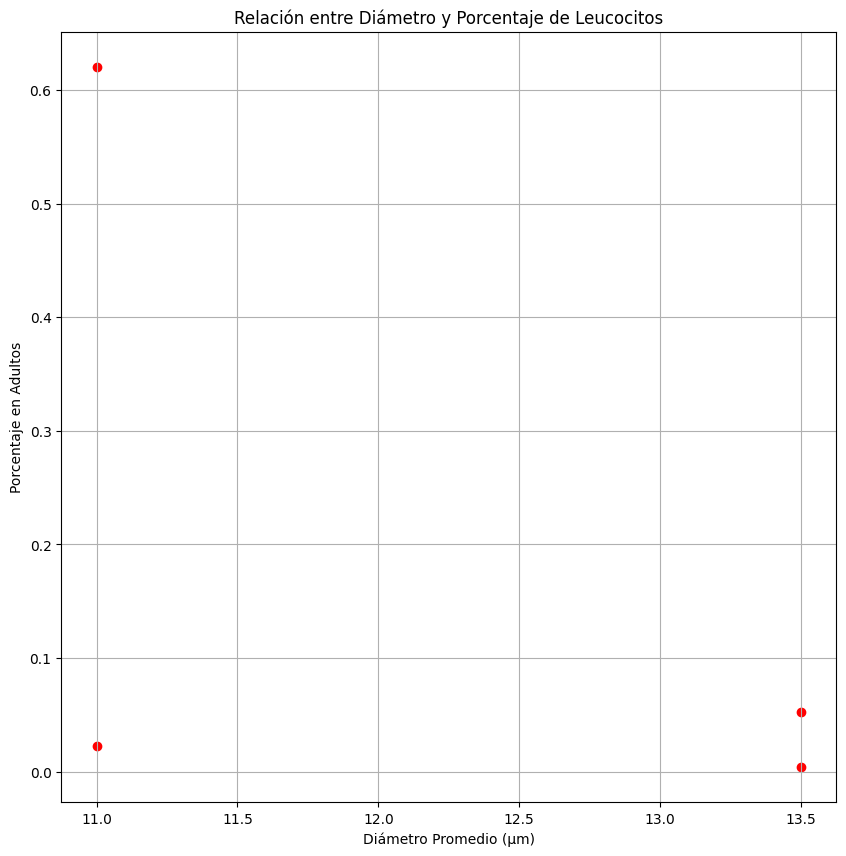

In [30]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Diámetro promedio (μm)'], df['Porcentaje aproximado en adultos'], color='red')

plt.title('Relación entre Diámetro y Porcentaje de Leucocitos')
plt.xlabel('Diámetro Promedio (μm)')
plt.ylabel('Porcentaje en Adultos')
plt.grid(True)
plt.show()



## Gráfico 2

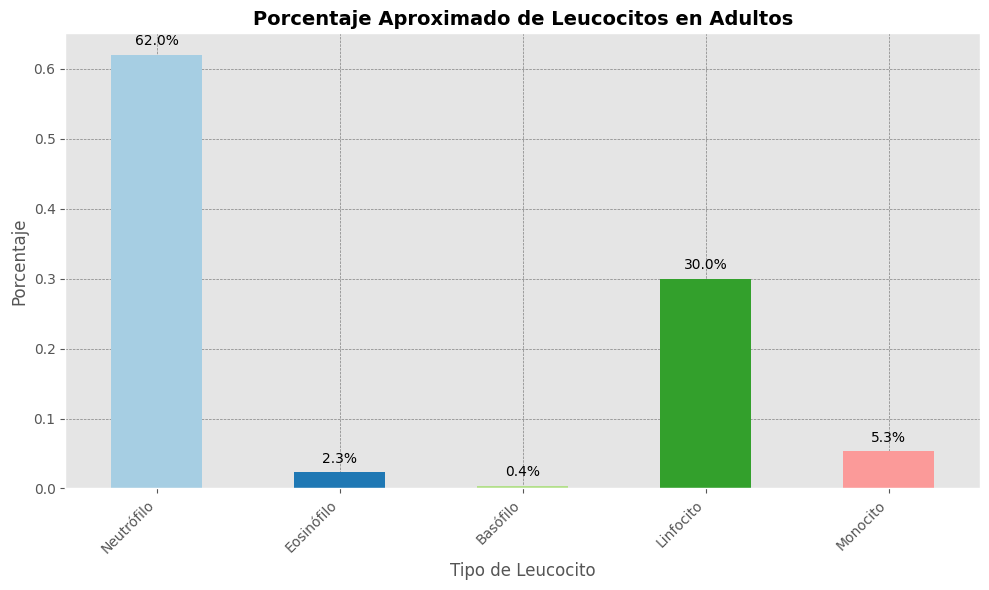

In [32]:
import matplotlib.pyplot as plt

# Aplicar un estilo predefinido
plt.style.use('ggplot')

# Graficar
ax = df['Porcentaje aproximado en adultos'].plot(kind='bar', color=plt.cm.Paired(range(len(df))), figsize=(10, 6))

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Ajustar títulos y etiquetas
plt.title('Porcentaje Aproximado de Leucocitos en Adultos', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Leucocito', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Ajustar la alineación para mejorar la legibilidad

# Ajustar la cuadrícula
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot para que el subplot(s) se ajuste al área del gráfico.
plt.show()

